# **Introduction**

Dans ce projet, nous allons fine-tuner le modèle de langage **Neo** en utilisant le dataset **Instruction-Poems**. L'objectif est de créer un modèle capable de générer des poèmes cohérents, créatifs, et adaptés à des instructions spécifiques. Ce projet implique une exploration approfondie des données, un nettoyage méthodique, une préparation minutieuse pour l'entraînement, et une évaluation rigoureuse des performances du modèle.

#**1. Exploration des données**

Installation des Dépendances Nécessaires

In [1]:
!pip install transformers[torch] datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install bitsandbytes trl peft tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 29.6 MB/s eta 0:00:00


In [3]:
!pip install accelerate tqdm rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=f0cecbc1f0efcc12e778ebbf6812d3ae376f0a3d3e8d222044c497207551e09e
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [4]:
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187815463 sha256=d944fc7d2f962bce83fc4708c2fc0c21eaf8255962a0b350ae919362a51b7ef2
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn


Chargement des Bibliothèques

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset

Chargement des Jeux de Données

In [6]:
ds = load_dataset("checkai/instruction-poems")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

output.parquet:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13854 [00:00<?, ? examples/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['INSTRUCTION', 'RESPONSE', 'SOURCE', 'METADATA'],
        num_rows: 13854
    })
})

Conversion de `df` en DataFrame

In [8]:
df = pd.DataFrame(ds['train'])
# df = pd.read_csv('PoetryFoundationData.csv')

In [9]:
df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
0,"Compose a poem, about Living,Death,The Body,Na...","I've written a poem for you about Living,Death...",PoetryFoundation.org - kari edwards,"{""author"": ""kari edwards"", ""title"": ""\""[ready ..."
1,"Make a poem with themes of Religion,Faith & Do...","Here's a beautiful poem about Religion,Faith &...",PoetryFoundation.org - Thomas P. Lynch,"{""author"": ""Thomas P. Lynch"", ""title"": ""\""Argy..."
2,"Make a poem with themes of Religion,Faith & Do...","Sure, I can do that. Here's a poem about Relig...",PoetryFoundation.org - Robert Bly,"{""author"": ""Robert Bly"", ""title"": ""\""Wanting S..."
3,"Write me a poem about Religion,Faith & Doubt,G...","Here's a poem I composed about Religion,Faith ...",PoetryFoundation.org - Sheena Raza Faisal,"{""author"": ""Sheena Raza Faisal"", ""title"": ""\""a..."
4,"Write me a poem about Living,Growing Old,Natur...","It's called ""February Evening in New York"": \n...",PoetryFoundation.org - Denise Levertov,"{""author"": ""Denise Levertov"", ""title"": ""\""Febr..."


In [10]:
df.shape

(13854, 4)

À cette étape, nous divisons le dataset `df` en ensembles d'entraînement, de test et de validation.

In [11]:
train_df, test_df, validation_df = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
train_df.shape, test_df.shape, validation_df.shape

((11083, 4), (1385, 4), (1386, 4))

Dans cette étape, nous sélectionnons un sous-ensemble de l'ensemble d'entraînement. Cela permet de réduire la taille des données pour un traitement plus rapide lors des phases de développement et de test.

In [13]:
train_df = train_df.sample(frac=0.2, random_state=42)

In [14]:
train_df.shape

(2217, 4)

In [15]:
test_df= test_df.sample(frac=0.2, random_state=42)
test_df.shape

(277, 4)

In [16]:
validation_df= validation_df.sample(frac=0.2, random_state=42)
validation_df.shape

(277, 4)

Afficher un aperçu des datasets

In [17]:
train_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
7187,Make a poem with themes of Social Commentaries...,"Okay, a poem about Social Commentaries,Cities ...",PoetryFoundation.org - Louise Imogen Guiney,"{""author"": ""Louise Imogen Guiney"", ""title"": ""\..."
12947,"Make a poem with themes of Living,Nature,Anima...","Sure, I can do that. Here's a poem about Livin...",PoetryFoundation.org - Knar Gavin,"{""author"": ""Knar Gavin"", ""title"": ""\""Statocyst..."
10935,"Compose a poem, about Living,Infancy,Parenthoo...","Of course! It's called ""Tinnitus: May, low ski...",PoetryFoundation.org - David Harsent,"{""author"": ""David Harsent"", ""title"": ""\""Tinnit..."
2721,"Make a poem with themes of Activities,Jobs & W...","Here's a beautiful poem about Activities,Jobs ...",PoetryFoundation.org - David Rivard,"{""author"": ""David Rivard"", ""title"": ""\""Torque\..."
10409,"Can you write a poem? Make it about Living,Gro...","Here's a beautiful poem about Living,Growing O...",PoetryFoundation.org - Larry Levis,"{""author"": ""Larry Levis"", ""title"": ""\""Winter S..."


In [18]:
test_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
12086,"I want a poem about Activities,Travels & Journ...","I've written a poem for you about Activities,T...",PoetryFoundation.org - Douglas Kearney,"{""author"": ""Douglas Kearney"", ""title"": ""\""Afro..."
13246,Title this poem: \nI\r\n\r\nThe spider expects...,"How about calling it ""The Spider""?",PoetryFoundation.org - Richard Eberhart,"{""author"": ""Richard Eberhart"", ""title"": ""\""The..."
5901,"Make a poem with themes of Living,Love,Relatio...","Of course! It's called ""The Window"": \nyou are...",PoetryFoundation.org - Diane di Prima,"{""author"": ""Diane di Prima"", ""title"": ""\""The W..."
5420,"Compose a poem, about Living,Death,Marriage & ...","I've written a poem for you about Living,Death...",PoetryFoundation.org - Donald Davie,"{""author"": ""Donald Davie"", ""title"": ""\""No Epit..."
3493,"Compose a poem, about Love,Break-ups & Vexed L...","I've written a poem for you about Love,Break-u...",PoetryFoundation.org - Edmund Spenser,"{""author"": ""Edmund Spenser"", ""title"": ""\""Amore..."


In [19]:
validation_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
1542,"Compose a poem, about Life Choices,Arts & Scie...","Of course! It's called ""The God Called Poetry""...",PoetryFoundation.org - Robert Graves,"{""author"": ""Robert Graves"", ""title"": ""\""The Go..."
260,"Can you write a poem? Make it about Living,Dea...","Of course! It's called ""Immortality Ode"": \nMi...",PoetryFoundation.org - Bruce Smith,"{""author"": ""Bruce Smith"", ""title"": ""\""Immortal..."
7455,"Compose a poem, about Religion,God & the Divin...","It's called ""Reemergence of the Noose"": \nSome...",PoetryFoundation.org - Patricia Smith,"{""author"": ""Patricia Smith"", ""title"": ""\""Reeme..."
7651,"I want a poem about Activities,Travels & Journ...","Here's your poem about Activities,Travels & Jo...",PoetryFoundation.org - Mark Rudman,"{""author"": ""Mark Rudman"", ""title"": ""\""Provo\""""..."
10262,"Write me a poem about Living,Death,Parenthood,...","I've written a poem for you about Living,Death...",PoetryFoundation.org - Mary Karr,"{""author"": ""Mary Karr"", ""title"": ""\""Requiem fo..."


Exploration de Quelques Lignes de Notre Dataset d’Entraînement

In [20]:
# train_df['Title'][7187]

In [21]:
# print(train_df['Poem'][7187])

In [22]:
# train_df['Poet'][7187]

In [23]:
# train_df['Tags'][7187]

Comme on peut le remarquer, `Unnamed: 0` ne sera pas vraiment utile pour l'entraînement de notre modèle, contrairement à `Title`, `Poem`, `Poet` et `Tags`, que nous allons conserver pour l'entraînement.

Nous allons concaténer `Response` et `Source` pour déterminer, pour chaque poème généré, sa source.



In [24]:
response = f"{train_df['RESPONSE'][7187]} \nSource: {train_df['SOURCE'][7187]}"

In [25]:
print(response)

Okay, a poem about Social Commentaries,Cities & Urban Life: 
"The Lights of London"
The evenfall, so slow on hills, hath shot Far down into the valley’s cold extreme, Untimely midnight; spire and roof and stream Like fleeing specters, shudder and are not. The Hampstead hollies, from their sylvan plot Yet cloudless, lean to watch as in a dream, From chaos climb with many a sudden gleam, London, one moment fallen and forgot. Her booths begin to flare; and gases bright Prick door and window; all her streets obscure Sparkle and swarm with nothing true nor sure, Full as a marsh of mist and winking light; Heaven thickens over, Heaven that cannot cure Her tear by day, her fevered smile by night. 
Source: PoetryFoundation.org - Louise Imogen Guiney


In [26]:
for index, row in train_df.iterrows():
  i = index
  train_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [27]:
for index, row in test_df.iterrows():
  i = index
  test_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [28]:
for index, row in validation_df.iterrows():
  i = index
  validation_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [29]:
print(train_df['RESPONSE'][7187])

Okay, a poem about Social Commentaries,Cities & Urban Life: 
"The Lights of London"
The evenfall, so slow on hills, hath shot Far down into the valley’s cold extreme, Untimely midnight; spire and roof and stream Like fleeing specters, shudder and are not. The Hampstead hollies, from their sylvan plot Yet cloudless, lean to watch as in a dream, From chaos climb with many a sudden gleam, London, one moment fallen and forgot. Her booths begin to flare; and gases bright Prick door and window; all her streets obscure Sparkle and swarm with nothing true nor sure, Full as a marsh of mist and winking light; Heaven thickens over, Heaven that cannot cure Her tear by day, her fevered smile by night. 
Source: PoetryFoundation.org - Louise Imogen Guiney


In [30]:
train_df = train_df[['INSTRUCTION',	'RESPONSE']]
test_df = test_df[['INSTRUCTION',	'RESPONSE']]
validation_df = validation_df[['INSTRUCTION',	'RESPONSE']]

**Vérification des valeurs manquantes**

In [31]:
train_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


In [32]:
test_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


In [33]:
validation_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


D'après ces résultats, on peut bien remarquer qu'aucune valeur manquante n'a été détectée dans les colonnes `INSTRUCTION` et `RESPONSE` des ensembles d'entraînement, de test, et de validation. Cela garantit que le dataset est complet et prêt pour les étapes suivantes.

**Description statistique des colonnes du dataset d'entraînement**

In [34]:
train_desciption = train_df.describe()

In [35]:
train_desciption

,INSTRUCTION,RESPONSE
count,2217,2217
unique,1902,2217
top,Compose a poem.,"Sure, I can do that. Here's a poem about The B..."
freq,30,1


**Affichage des instruction et de la reponse les plus fréquents**

In [36]:
top_INSTRUCTION = train_desciption['INSTRUCTION'].iloc[2]
print("Top INSTRUCTION :", top_INSTRUCTION)

Top INSTRUCTION : Compose a poem.


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **4 433 instructions**, ce qui correspond au nombre total d'entrées dans le dataset.
- **Unique** : Elle compte **3 644 instructions uniques**, ce qui montre qu'il existe des doublons dans les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, qui est une demande générique pour un poème.
- **Frequency** : Cette instruction apparaît **56 fois**, ce qui suggère qu'une part notable du dataset est composée de cette demande spécifique.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **4 433 réponses**, ce qui correspond parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction.
- **Unique** : Toutes les réponses sont **uniques** (4 433 uniques), ce qui signifie que chaque poème généré est distinct, même si certaines instructions se répètent.
- **Top** : La réponse la plus fréquente commence par **`"Here's a poem I composed about Living, Death, So..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, ce qui confirme la diversité des poèmes générés.

**Description statistique des colonnes du dataset de validation**

In [37]:
validation_df.describe()

,INSTRUCTION,RESPONSE
count,277,277
unique,260,277
top,Write me a poem.,"Here's a beautiful poem about Living,Coming of..."
freq,5,1


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **1 386 instructions**, ce qui correspond au nombre total d'entrées dans l'ensemble de validation.
- **Unique** : Elle compte **1 223 instructions uniques**, ce qui montre qu'il existe des doublons parmi les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, qui semble être une demande générique pour un poème.
- **Frequency** : Cette instruction apparaît **19 fois**, ce qui indique qu'elle est relativement fréquente.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **1 386 réponses**, ce qui correspond parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction.
- **Unique** : Toutes les réponses sont **uniques** (1 386 uniques), ce qui signifie que chaque poème généré est distinct dans l'ensemble de validation.
- **Top** : La réponse la plus fréquente commence par **`"It's called "Chanson Philosophique": The nom..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, ce qui confirme que les réponses sont diverses et non répétées.

**Description statistique des colonnes du dataset de test**

In [38]:
test_df.describe()

,INSTRUCTION,RESPONSE
count,277,277
unique,261,277
top,I want a poem.,"Here's a poem I composed about Activities,Trav..."
freq,6,1


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **1 385 instructions**, ce qui correspond au nombre total d'exemples dans l'ensemble de test.
- **Unique** : Elle compte **1 256 instructions uniques**, ce qui montre qu'il existe des doublons dans les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, une demande générique de poème.
- **Frequency** : Cette instruction apparaît **19 fois**, ce qui, indique une répétition modérée.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **1 385 réponses**, correspondant parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction dans l'ensemble de test.
- **Unique** : Toutes les réponses sont **uniques** (1 385 uniques), ce qui signifie que chaque poème généré est distinct.
- **Top** : La réponse la plus fréquente commence par **`"Okay, a poem about Activities, Jobs & Working, T..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, confirmant que l'ensemble de test présente une grande diversité dans les réponses.

**Analyse des Longueurs des instruction et response**


In [39]:
from collections import Counter

In [40]:
train_df['INSTRUCTION_length'] = train_df['INSTRUCTION'].apply(len)
train_df['RESPONSE_length'] = train_df['RESPONSE'].apply(len)

# Statistiques descriptives
train_df[['INSTRUCTION_length', 'RESPONSE_length']].describe()

<ipython-input-40-3565955ee217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['INSTRUCTION_length'] = train_df['INSTRUCTION'].apply(len)


,INSTRUCTION_length,RESPONSE_length
count,2217.000000,2217.000000
mean,174.997294,1548.333333
std,528.961460,2230.326991
min,12.000000,75.000000
25%,66.000000,666.000000
50%,97.000000,1054.000000
75%,146.000000,1720.000000
max,19026.000000,54365.000000


- Les instructions ont une longueur moyenne de **185 caractères**, avec un minimum de **12** et un maximum de **19 872 caractères**, montrant une grande variabilité. La plupart des instructions sont courtes, comme indiqué par le troisième quartile (**146 caractères**), mais l'écart-type élevé (**631 caractères**) révèle la présence de quelques instructions extrêmement longues.

- Les réponses ont une longueur moyenne de **1 586 caractères**, avec un minimum de **67** et un maximum de **54 365 caractères**, soulignant une diversité encore plus marquée. Bien que la majorité des réponses soient modérées (75 % ≤ **1 742 caractères**), l'écart-type élevé (**2 495 caractères**) met en évidence des poèmes très longs qui pourraient nécessiter une troncature pour un traitement efficace.

**Répartition des Catégories de Longueur**

In [41]:
def categorize_length(length):
    if length < 50:
        return 'Court'
    elif 50 <= length < 150:
        return 'Moyen'
    else:
        return 'Long'

train_df['INSTRUCTION_category'] = train_df['INSTRUCTION_length'].apply(categorize_length)
train_df['RESPONSE_category'] = train_df['RESPONSE_length'].apply(categorize_length)

<ipython-input-42-04b6cbd5d1cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='INSTRUCTION_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])


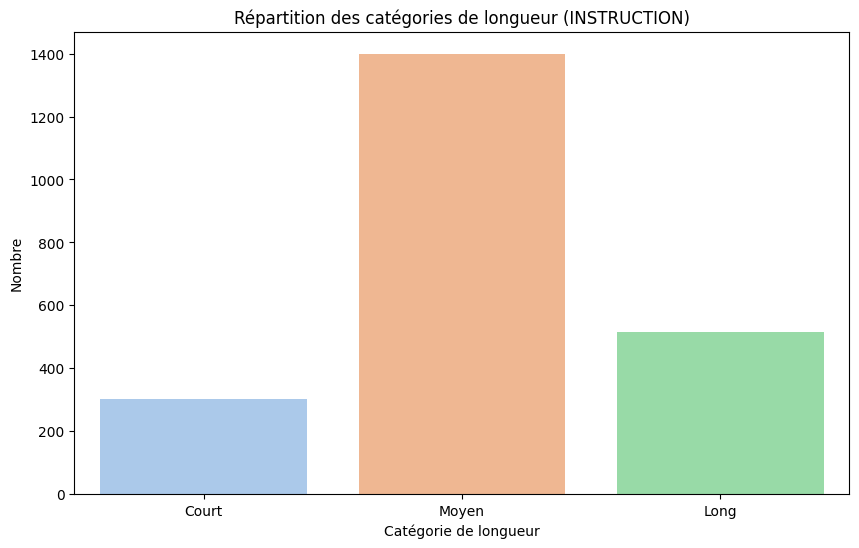

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='INSTRUCTION_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])
plt.title('Répartition des catégories de longueur (INSTRUCTION)')
plt.xlabel('Catégorie de longueur')
plt.ylabel('Nombre')
plt.show()

La majorité des instructions se trouvent dans la catégorie **Moyen** (50-150 caractères), ce qui suggère que les consignes sont généralement bien équilibrées entre brièveté et clarté. Les instructions longues (> 150 caractères) constituent une part notable, apportant probablement un contexte plus détaillé pour des réponses plus complexes. Enfin, les instructions courtes (< 50 caractères) sont les moins fréquentes, reflétant une préférence pour des consignes fournissant un minimum de contexte. Cette répartition diversifiée offre un bon équilibre pour entraîner un modèle capable de gérer différentes complexités d'instructions.

<ipython-input-43-8c1d34c3c3d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RESPONSE_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])


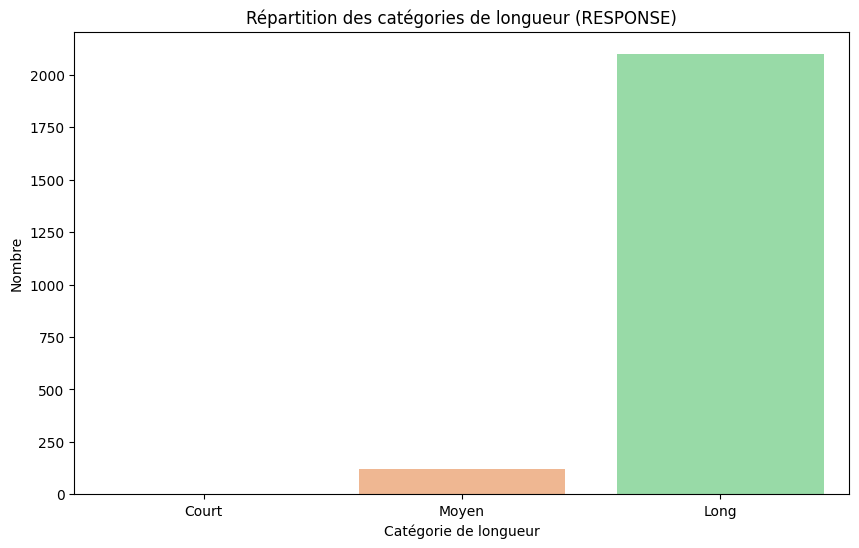

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RESPONSE_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])
plt.title('Répartition des catégories de longueur (RESPONSE)')
plt.xlabel('Catégorie de longueur')
plt.ylabel('Nombre')
plt.show()

La majorité des réponses appartiennent à la catégorie **Long** (> 150 caractères), ce qui indique que les poèmes générés sont généralement détaillés et développés, fournissant un contenu riche en réponse aux instructions. Les réponses de longueur moyenne (50-150 caractères) sont rares, tandis que les réponses courtes (< 50 caractères) sont presque inexistantes, montrant une préférence marquée pour des réponses substantiellement élaborées. Cette répartition est cohérente avec l'objectif de générer des poèmes riches et expressifs, bien adaptés au contexte des instructions.

**Distribution des Longueurs**

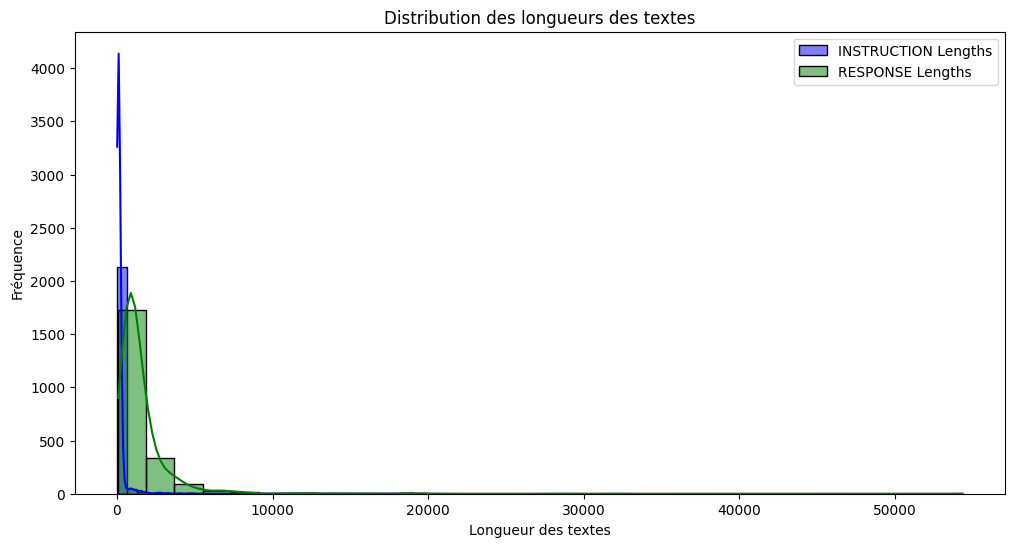

In [44]:
# Visualisation des distributions des longueurs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(train_df['INSTRUCTION_length'], bins=30, kde=True, label="INSTRUCTION Lengths", color='blue')
sns.histplot(train_df['RESPONSE_length'], bins=30, kde=True, label="RESPONSE Lengths", color='green')
plt.title('Distribution des longueurs des textes')
plt.xlabel('Longueur des textes')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

Ce graphe montre une nette différence entre la distribution des longueurs des instructions et des réponses. Les instructions, généralement comprises entre **50 et 200 caractères**, sont relativement courtes et concentrées autour d'une moyenne basse, indiquant leur rôle de consignes claires et concises. En revanche, les réponses sont beaucoup plus longues, avec une large distribution allant jusqu'à **plus de 50 000 caractères**, reflétant la richesse et la profondeur des poèmes générés. Cette distinction est cohérente avec le besoin d'instructions simples pour produire des sorties détaillées et élaborées.

**Analyse de la diversité lexicale**

In [45]:
import re

def calculate_lexical(column):
    # Combiner tout le texte en une seule chaîne
    all_text = ' '.join(column)

    # convertir tout en minuscules et retirer les ponctuations
    all_text_cleaned = re.sub(r'[^\w\s]', '', all_text.lower())

    # Séparer les mots
    words = all_text_cleaned.split()

    # Identifier les mots uniques
    unique_words = set(words)

    # Calculer la diversité lexicale
    return len(unique_words) / len(words) if len(words) > 0 else 0

In [46]:
INSTRUCTION_diversity = calculate_lexical(train_df['INSTRUCTION'])
RESPONSE_diversity = calculate_lexical(train_df['RESPONSE'])

print("Diversité lexicale (INSTRUCTION): ", INSTRUCTION_diversity)
print("Diversité lexicale (RESPONSE): ", RESPONSE_diversity)

Diversité lexicale (INSTRUCTION):  0.1579428989751098
Diversité lexicale (RESPONSE):  0.08646411828014161


**1. Diversité lexicale des instructions** : **12.87%**  
   - Environ **13%** des mots dans les instructions sont uniques, ce qui montre une diversité modérée. Cela reflète la variété des consignes, avec des termes qui reviennent fréquemment pour structurer les demandes.

**2. Diversité lexicale des réponses** : **6.49%**  
   - La diversité lexicale est nettement plus faible pour les réponses, avec environ **6%** de mots uniques. Cela indique une utilisation récurrente de motifs poétiques ou stylistiques propres à la génération de poèmes.

**Corrélation entre la longueur des instructions et des poeme**

In [47]:
length_correlation = train_df['INSTRUCTION_length'].corr(train_df['RESPONSE_length'])
print("Corrélation des longueurs: ", length_correlation)

Corrélation des longueurs:  -0.06268968042780167


La corrélation légèrement négative (**-0.06**) entre la longueur des instructions et celle des réponses indique qu'il n'existe presque aucune relation linéaire entre ces deux variables. Cela suggère que la longueur des poèmes générés ne dépend pas directement de la longueur des instructions.

**Similarité entre instructions et réponses**

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train_df['INSTRUCTION'] + train_df['RESPONSE'])

# Calcul de similarité moyenne
cosine_similarities = cosine_similarity(tfidf_matrix)
average_similarity = cosine_similarities.mean()

average_similarity

0.025670637650026643

La similarité cosinus moyenne est faible (**0.0256**), indiquant que les instructions et réponses du dataset ont un contenu lexical globalement peu similaire, ce qui reflète une bonne diversité dans les données.

In [49]:
def classify_sentence_type(text):
    if '?' in text:
        return 'question'
    elif '!' in text:
        return 'exclamation'
    else:
        return 'neutral'

train_df['INSTRUCTION_type'] = train_df['INSTRUCTION'].apply(classify_sentence_type)
train_df['RESPONSE_type'] = train_df['RESPONSE'].apply(classify_sentence_type)

# Proportions des types
INSTRUCTION_type_distribution = train_df['INSTRUCTION_type'].value_counts(normalize=True)
RESPONSE_type_distribution = train_df['RESPONSE_type'].value_counts(normalize=True)

In [50]:
print("Instruction Type Distribution: \n",INSTRUCTION_type_distribution)

Instruction Type Distribution: 
 INSTRUCTION_type
neutral        0.755525
question       0.241768
exclamation    0.002706
Name: proportion, dtype: float64


In [51]:
print("Resonse Type Distribution: \n",RESPONSE_type_distribution)

Resonse Type Distribution: 
 RESPONSE_type
neutral        0.524132
question       0.341001
exclamation    0.134867
Name: proportion, dtype: float64


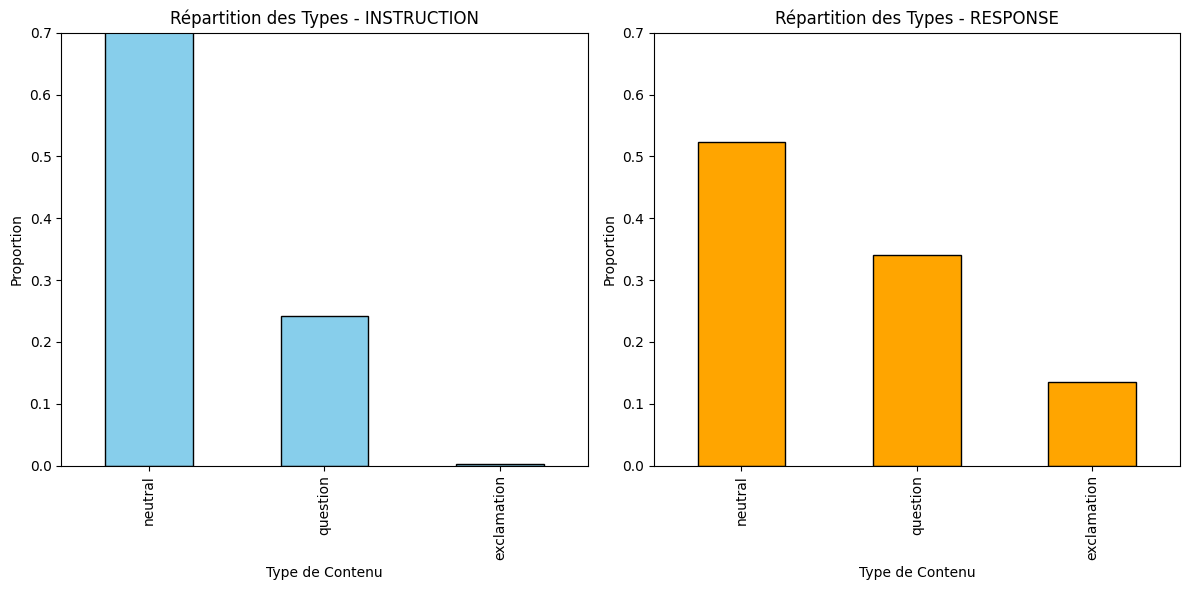

In [52]:
# Visualisation des distributions des types
plt.figure(figsize=(12, 6))

# Distribution des types des instructions
plt.subplot(1, 2, 1)
INSTRUCTION_type_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des Types - INSTRUCTION')
plt.xlabel('Type de Contenu')
plt.ylabel('Proportion')
plt.ylim(0, 0.7)

# Distribution des types des réponse
plt.subplot(1, 2, 2)
RESPONSE_type_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Répartition des Types - RESPONSE')
plt.xlabel('Type de Contenu')
plt.ylabel('Proportion')
plt.ylim(0, 0.7)

plt.tight_layout()
plt.show()

**1. Instructions (INSTRUCTION)** :
   - La majorité des instructions (**76.8%**) sont de type **neutre**, indiquant qu'elles sont souvent des demandes ou des consignes simples, sans question ni exclamation.
   - Les instructions de type **question** représentent environ **22.9%**, ce qui reflète des demandes formulées sous forme interrogative.
   - Les instructions avec des exclamations sont très rares (**0.3%**), soulignant que peu de consignes expriment un ton particulièrement emphatique.

**2. Réponses (RESPONSE)** :
   - Les réponses **neutres** restent dominantes (**52.4%**), mais leur proportion est réduite par rapport aux instructions.
   - Les réponses de type **question** augmentent significativement (**33.7%**), ce qui peut refléter un style interactif ou des réponses cherchant à engager l'utilisateur.
   - Les réponses avec des **exclamations** sont également plus fréquentes (**13.9%**), probablement en raison du style poétique qui favorise des expressions emphatiques.

Ce contraste montre que les réponses adoptent un style plus expressif et interactif, s'écartant des instructions qui sont principalement neutres et informatives.

#**2. Nettoyage des données**

Après toute cette exploration effectuée sur nos données (longueurs, similarités, etc.), nous pouvons affirmer que nos données sont bien nettoyées et prêtes à être utilisées pour le fine-tuning de notre modèle 'Mistral'.
C'est ce que nous allons voir dans la suite.

#**3. Préparation des données** :

Configuration de l'utilisation du GPU

In [53]:
import torch
device_map = {"": torch.cuda.current_device()} if torch.cuda.is_available() else None

Chargement du modèle et du tokenizer et application de QLoRA

In [54]:
model_name = "EleutherAI/gpt-neox-20b"

In [55]:
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16

)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [56]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    # torch_dtype=torch.float16,
    # attn_implementation="flash_attention_2",
    device_map="auto",
  )

tokenizer_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/457k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

model-00001-of-00046.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00002-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00003-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00004-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00005-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00006-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00007-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00008-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00009-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00010-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00011-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00012-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00013-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00014-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00015-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00016-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00017-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00018-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00019-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00020-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00021-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00022-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00023-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00024-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00025-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00026-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00027-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00028-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00029-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00030-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00031-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00032-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00033-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00034-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00035-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00036-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00037-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00038-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00039-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00040-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00041-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00042-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00043-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00044-of-00046.safetensors:   0%|          | 0.00/910M [00:00<?, ?B/s]

model-00045-of-00046.safetensors:   0%|          | 0.00/604M [00:00<?, ?B/s]

model-00046-of-00046.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


Loading checkpoint shards:   0%|          | 0/46 [00:00<?, ?it/s]

In [57]:
tokenizer.pad_token = tokenizer.eos_token

###Test du modèle avant le fine tuning

In [58]:
def generate_poem(prompt_2):
  tokenized_inpout = tokenizer(prompt_2, return_tensors="pt", max_length=200)
  input_ids = tokenized_inpout.input_ids
  attention_mask = tokenized_inpout.attention_mask

  gen_tokens = model.generate(
      input_ids=input_ids.to(model.device),
      attention_mask=attention_mask.to(model.device),
      do_sample=True,
      temperature=0.9,
      max_new_tokens=250,
      pad_token_id=tokenizer.eos_token_id
  )
  gen_text = tokenizer.batch_decode(gen_tokens)[0]
  return gen_text

gptneox20b_answer

In [59]:
prompt = "I want to be a poet"
print("generated prompt : \n\n", generate_poem(prompt))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


generated prompt : 

 I want to be a poet." And when I looked at him over the glass I had the impulse to tell him how lovely he was, with a little shiver of apprehension that he would take my words amiss. The words, indeed, were nothing. I had seen him with the others, and he was not lovely: I had seen him alone in the garden and he was. I saw a handsome, intelligent young man of the type I had seen hundreds like, handsome and pleasant and intelligent, of a type that does not appeal to me; and it gave me a passing qualm of uneasiness that he should think me an exception to his type.

"There is something I must tell you," he said abruptly, "I hate to tell it, but I can't tell it any other way. I know about you and the man who spoke to you on the bridge. He's a friend of mine—old friend—I met him at a house in the country, and at first he didn't even tell me his name. He told me later; but that's why I can't talk to him about it."

"Why not, if I can?"

"Oh, because if he knew anything a

neox20b_answer

In [60]:
prompt_2 = "give me a very good poem about love"

In [61]:
print("generated prompt : \n\n", generate_poem(prompt_2))

generated prompt : 

 give me a very good poem about love that has never been done
     before'

     A. SCR. I should so like to write a love poem that has
     never been done, a poem that will be of value and yet unique.

     D. J. But you must be careful.

     A. S. Indeed I am.

     D. J. Of course, I am a man of the world, and you may make me
     a very foolish, conceited man of the world, but I have been a
     man of the world all my life. Have you ever been a man of the
     world?

     A. S. Not often.

     D. J. So much the better; you are an original.

     A. S. I hope I am.

     D. J. But there are many things about you I think are
     original.

     A. S. Indeed there are.

     D. J. For instance, I can't believe you are a teetotaler.

     A. S. No, I do not drink now.

     D. J. Then you are not really a sportsman.

     A. S.


gpt2_answer

In [62]:
print("generated prompt : \n\n", generate_poem(prompt_2))

generated prompt : 

 give me a very good poem about love, and a few very good lines of
Latin. I believe a poet is better versed in Latin and Greek than in any
other language; but I am not a poet myself, and I have often felt
ashamed for this reason. In fact, I have very grave doubts in regard to
the possibility of a learned man being an honest man. The idea of
having inborn, and hereditary, and natural learning, seems to me as
vulgar and absurd as the idea of having naturally and inborn manners
and appearance. Learning itself is a thing which requires time,
application, and study; now, if a man has applied himself to study, if
he has applied himself to it for a long time, and if he has very much
enjoyed doing it, and if he has become a very skilful and ingenious
man, how is it possible that so skilful and ingenious a man should ever
have a right to be called a fool for his pains, because he had a
learning which he cannot help? If ever he finds out that it really is
so, if ever he find

gptneo20banswer

tester en francais

In [63]:
prompt = (
    "Vous êtes un poète classique français. Votre rôle est de composer un poème lyrique "
    "inspiré par la nature, exprimant des émotions profondes avec un langage riche et imagé.\n\n"
    "Thème : {thème}\n\n"
    "Poème :"
)

# Remplacez {thème} par le mot-clé fourni par l'utilisateur
theme = "l'amour et les étoiles"
formatted_prompt = prompt.format(thème=theme)

In [64]:
print("generated prompt : \n\n", generate_poem(formatted_prompt))

generated prompt : 

 Vous êtes un poète classique français. Votre rôle est de composer un poème lyrique inspiré par la nature, exprimant des émotions profondes avec un langage riche et imagé.

Thème : l'amour et les étoiles

Poème : La Coupe magique

La légende du Père des chiens

Le roman français

Vous êtes un romancier classique français. Vous avez reçu un projet de roman de grand style mais vous ne savez pas d'où il vient et comment il vous sera propageable.

Thème : la liberté

Poème : La Révolte de la ménagère

La légende du Père des chiens

Le roman français

Vous êtes un romancier classique français. Vous avez reçu un projet de roman de grand style mais vous ne savez pas d'où il vient et comment il vous sera propageable.

Thème : la liberté

Poème : La Défaite de l'ennemi

La légende du Père des chiens

Le roman français

Vous êtes un romancier classique français. Vous avez reçu un projet de roman de grand


gpt2_answer

In [65]:
print("generated prompt : \n\n", generate_poem(formatted_prompt))

generated prompt : 

 Vous êtes un poète classique français. Votre rôle est de composer un poème lyrique inspiré par la nature, exprimant des émotions profondes avec un langage riche et imagé.

Thème : l'amour et les étoiles

Poème : un jeune fils et une jeune fille, rencontrent l'amour au ciel du matin.

Structure :

• Introduction et rédaction : faire votre sonnet, soulever vos problèmes (thème 1)

• L'incident : faire une sonnette pour un jeune et une jeune fille, soulever vos problèmes (thème 2).

• Sonnet et fin : une nuit, la fuite de la jeune fille, la disparition des sonnets (thème 2 et 3)

• Sonnet et sonnette : une nuit, la fuite des sonnets et la fuite de la jeune fille (thème 3 et 4).

Voix intérieure : la présence ou l'absence du jeune fils ou de la jeune fille

Structure :

• Introduction et rédaction : faire un sonnet de deux fois

• Sonnet et sonnette : une nuit, la fuite de la jeune fille, la disparition des sonnets

• Sonnet et


In [66]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

model = prepare_model_for_kbit_training(model)

lora_config = LoraConfig(
    r=64,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["attention.query_key_value", "attention.dense"],
)

model = get_peft_model(model, lora_config)

In [67]:
model.print_trainable_parameters()

trainable params: 103,809,024 || all params: 20,658,376,704 || trainable%: 0.5025


Séparation des données en ensembles d'entrée `X` et de sortie `y` pour l'entraînement, la validation et les tests

In [68]:
X_train_data = train_df['INSTRUCTION'].values
X_validation_data = validation_df['INSTRUCTION'].values
X_test_data = test_df['INSTRUCTION'].values

y_train_data = train_df['RESPONSE'].values
y_validation_data = validation_df['RESPONSE'].values
y_test_data = test_df['RESPONSE'].values

In [69]:
X_train_data.shape, X_validation_data.shape, X_test_data.shape

((2217,), (277,), (277,))

Tokenisation des données d'entrée (instructions) et de sortie (poemes) pour l'entraînement, la validation et les tests

In [70]:
# Tokenisation des entrées
X_train_tokens = tokenizer(X_train_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
X_validation_tokens = tokenizer(X_validation_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
X_test_tokens = tokenizer(X_test_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)

# Tokenisation des sortie
y_train_tokens = tokenizer(y_train_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
y_validation_tokens = tokenizer(y_validation_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
y_test_tokens = tokenizer(y_test_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)


Adaptation des datasets d'entraînement, de validation et de test pour le fine-tuning

In [71]:
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings.input_ids)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        label = self.labels.input_ids[idx]
        item['labels'] = torch.tensor(label)
        return item

train_dataset = CustomDataset(X_train_tokens, y_train_tokens)
validation_dataset = CustomDataset(X_validation_tokens, y_validation_tokens)
test_dataset = CustomDataset(X_test_tokens, y_test_tokens)

#**4. Fine-tuning du modèle**

Gestion et optimisation de la mémoire GPU

In [72]:
import torch
torch.cuda.empty_cache()

In [73]:
!nvidia-smi

Mon Feb 10 01:15:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P0             52W /  400W |   14403MiB /  40960MiB |      9%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [74]:
!kill -9 <pid>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kill -9 <pid>'


In [75]:
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


Initialisation de l'accélérateur

In [76]:
import os
from accelerate import Accelerator
#Configuration des variables d'environnement pour optimiser l'efficacité GPU
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "dryrun"

# Initialisation de l'accélérateur
accelerator = Accelerator(mixed_precision="fp16")

Initialisation de DataCollator

In [77]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

Définition des arguments pour l'entraînement du modèle

In [78]:
from transformers import TrainingArguments
from trl import SFTTrainer

output_dir = "data/neo-20b-sft-lora_v0.1"

# Arguments d'entraînement
training_args = TrainingArguments(
    output_dir=output_dir,
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    # gradient_accumulation_steps=16,
    fp16=True,
    save_steps=2000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    gradient_checkpointing=True,
    optim="adamw_torch",
    report_to="none",
    eval_accumulation_steps=2
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Fonction de calcul des métriques d'évaluation du modèle

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    # Convertir les prédictions et les labels en texte
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Filtrer les labels pour exclure les IDs hors du vocabulaire
    filtered_labels = [
        [token_id for token_id in l if 0 <= token_id < tokenizer.vocab_size]
        for l in labels
    ]
    decoded_labels = tokenizer.batch_decode(filtered_labels, skip_special_tokens=True)

    # Calculer les scores ROUGE
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge_scores = [scorer.score(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]

    rouge1 = sum(score["rouge1"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rouge2 = sum(score["rouge2"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rougeL = sum(score["rougeL"].fmeasure for score in rouge_scores) / len(rouge_scores)

    # Calculer la similarité cosinus
    vectorizer = TfidfVectorizer().fit(decoded_preds + decoded_labels)
    tfidf_preds = vectorizer.transform(decoded_preds)
    tfidf_labels = vectorizer.transform(decoded_labels)
    similarities = [cosine_similarity(tfidf_preds[i], tfidf_labels[i])[0][0] for i in range(len(decoded_preds))]
    avg_similarity = sum(similarities) / len(similarities)

    # Calculer le score BLEU
    smoothing_function = SmoothingFunction().method1  # Utilise une méthode pour éviter les problèmes avec des petits n-grammes
    bleu_scores = [
        sentence_bleu([label.split()], pred.split(), smoothing_function=smoothing_function)
        for pred, label in zip(decoded_preds, decoded_labels)
    ]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)

    return {
        "rouge1": rouge1,
        "rouge2": rouge2,
        "rougeL": rougeL,
        "similarity": avg_similarity,
        "bleu": avg_bleu,
    }

Initialisation du Trainer pour le Fine-Tuning

In [80]:
# Initialiser le trainer
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator
)

<ipython-input-80-ac87e57b3bf7>:2: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Lancement de l'entraînement du modèle

In [81]:
trainer.train()

<ipython-input-71-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Similarity,Bleu
1,0.571800,0.664136,0.684263,0.471342,0.674279,0.510120,0.337666
2,0.569700,0.628614,0.699816,0.500392,0.688604,0.524736,0.347865
3,0.489800,0.620678,0.700228,0.499184,0.689215,0.524500,0.350631


<ipython-input-71-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)
<ipython-input-71-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use so

TrainOutput(global_step=6651, training_loss=0.6342579330148382, metrics={'train_runtime': 6966.6819, 'train_samples_per_second': 0.955, 'train_steps_per_second': 0.955, 'total_flos': 3.248112554901504e+17, 'train_loss': 0.6342579330148382, 'epoch': 3.0})

Évaluation finale du modèle sur l'ensemble de test

In [82]:
results = trainer.evaluate(test_dataset)

<ipython-input-71-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)


In [83]:
print("Résultats de l'évaluation :\n", results)

Résultats de l'évaluation :
 {'eval_loss': 0.6622928977012634, 'eval_rouge1': 0.6876265600254297, 'eval_rouge2': 0.48861091658679806, 'eval_rougeL': 0.6767939184199672, 'eval_similarity': 0.5053942376663835, 'eval_bleu': 0.338378816827835, 'eval_runtime': 628.8241, 'eval_samples_per_second': 0.441, 'eval_steps_per_second': 0.441, 'epoch': 3.0}


# **5. Évaluation des performances**

Connexion à Google Drive

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sauvegarde et exportation du modèle

In [85]:
trainer.save_model("/content/drive/MyDrive/projet_Gen_ia/gptneo20b_on_instruction_poems")

Chargement du modèle finetuner depuis Google Drive

In [86]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch

model_name = "/content/drive/MyDrive/projet_Gen_ia/gptneo20b_on_instruction_poems"
tokenizer = AutoTokenizer.from_pretrained(model_name, device_map="auto")

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    # quantization_config=quantization_config,
    torch_dtype=torch.float16,
    attn_implementation="flash_attention_2",
    device_map="auto",
  )

The `GPTNeoXFlashAttention2` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


Loading checkpoint shards:   0%|          | 0/46 [00:00<?, ?it/s]

Attribution du modèle à l'appareil approprié (GPU ou CPU)

In [87]:
validation_df.head()

,INSTRUCTION,RESPONSE
1542,"Compose a poem, about Life Choices,Arts & Scie...","Of course! It's called ""The God Called Poetry""..."
260,"Can you write a poem? Make it about Living,Dea...","Of course! It's called ""Immortality Ode"": \nMi..."
7455,"Compose a poem, about Religion,God & the Divin...","It's called ""Reemergence of the Noose"": \nSome..."
7651,"I want a poem about Activities,Travels & Journ...","Here's your poem about Activities,Travels & Jo..."
10262,"Write me a poem about Living,Death,Parenthood,...","I've written a poem for you about Living,Death..."


In [88]:
def generate_poem(prompt_2):
    # Ensure tokenizer and model are on the same device
    device = model.device  # Get the model's device

    tokenized_inpout = tokenizer(prompt_2, return_tensors="pt", max_length=200).to(device)  # Move tokenized input to device
    input_ids = tokenized_inpout.input_ids
    attention_mask = tokenized_inpout.attention_mask

    gen_tokens = model.generate(
        input_ids=input_ids,  # No need to move again, already on device
        attention_mask=attention_mask,  # No need to move again, already on device
        do_sample=True,
        temperature=0.9,
        max_new_tokens=150,
        pad_token_id=tokenizer.eos_token_id
    )
    gen_text = tokenizer.batch_decode(gen_tokens)[0]
    return gen_text

In [89]:
input = validation_df['INSTRUCTION'][1542]
print("input : ", input)
print("#"*30)

input :  Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.
##############################


In [90]:
print(generate_poem(input))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.Mythology & Folklore,Greek & Roman Mythology.The gods and goddesses of Mount Olympus have inspired the imagination of millions since the days of Homer. The same can be said of the monsters that inhabit its peaks: centaurs, sphinxes, Gorgons, griffins, drakons, chimera. Of all Greek and Roman mythological figures the most enduring is the half-giant, half-god known as the Minotaur, who dwelt in the labyrinth on the island of Crete until the Athenians arrived with the hero Theseus to slay him. But, once the Minotaur disappeared from sight, his existence remained a mystery. And so it remained until the


In [91]:
role = "You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided."

In [92]:
prompt = f"Role: {role} \nInstructions: {validation_df['INSTRUCTION'][1542]}\nassistant:"

In [93]:
input = prompt
print("input : ", input)
print("#"*30)
output =validation_df['RESPONSE'][260]
tokenized_inpout = tokenizer(input, return_tensors="pt", max_length=512, padding=True, truncation=True)
input_ids = tokenized_inpout["input_ids"]
attention_mask = tokenized_inpout["attention_mask"]
response = model.generate(
    input_ids=input_ids.to(model.device),
    attention_mask=attention_mask.to(model.device),
    max_new_tokens=400,
    temperature=0.6,
    top_k=60,
    pad_token_id=tokenizer.eos_token_id
)
response_text = tokenizer.decode(response[0])
predicted_poeme = response_text
print("predicted_poeme :\n ", predicted_poeme)

input :  Role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided. 
Instructions: Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.
assistant:
##############################


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `60` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


predicted_poeme :
  Role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided. 
Instructions: Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.
assistant: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided. 
Instructions: Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.

A:

I'm not sure if this is what you're looking for, but here's a poem I wrote about the arts and sciences.
Arts & Sciences

I’m a poet,
I’m a painter,
I’m a sculptor,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,


On remarque que cette sortie est plus cohérente.

In [94]:
ture_poeme = output
print("ture_poeme : ", ture_poeme)

ture_poeme :  Of course! It's called "Immortality Ode": 
Miss Bliss, once I thought I was endless

since father was perpetual in his grade school

of seedlings in cups, the overly loved pets, and recess

while mother was the lipsticked dancing girl

on the Steel Pier who would outstep Hitler.

I was insufferable when I rolled

the Volkswagen bus two times and lived

with the snow chains like costumed jewels

slung over me and the spare rolled

away as in a folktale.

The pact I made in the spinning instant

said in my language of American

boy, Put up or shut up, to God,

the State Trooper who was kind

and spoke of service and punishment

and giving yourself away.

Now, I’m alive through the agency

of iron and contract work and appeals

to the fallen—angel and dusk—

but wet-winged and still without you,

Miss Bliss, who took me inside

where there was an ocean

before which we were children.

That calm, that fear,

that witness of the two-thirds

of everything else. 
Source: PoetryF

In [95]:
print(predicted_poeme)

Role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided. 
Instructions: Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.
assistant: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided. 
Instructions: Compose a poem, about Life Choices,Arts & Sciences,Poetry & Poets,Social Commentaries.

A:

I'm not sure if this is what you're looking for, but here's a poem I wrote about the arts and sciences.
Arts & Sciences

I’m a poet,
I’m a painter,
I’m a sculptor,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m a musician,
I’m a composer,
I’m 

Fonction pour générer des prédictions et sauvegarder les résultats

In [102]:
def generate_poeme(dataset, output_file):
    results = []
    for index, row in dataset.iterrows():
        i = index
        prompt = f" <|system|>role: {role}</s><|user|>Instructions: {dataset['INSTRUCTION'][i]}<|assistant|></s>"
        input = prompt
        output = dataset['RESPONSE'][i]
        tokenized_inpout = tokenizer(input, return_tensors="pt", max_length=512, padding=True, truncation=True)
        input_ids = tokenized_inpout["input_ids"]
        attention_mask = tokenized_inpout["attention_mask"]
        response = model.generate(
            input_ids=input_ids.to(model.device),
            attention_mask=attention_mask.to(model.device),
            max_new_tokens=400,
            # temperature=0.6,
            # top_k=60,
            pad_token_id=tokenizer.eos_token_id
        )
        response_text = tokenizer.decode(response[0], skip_special_tokens=True)
        predicted_poeme = response_text
        ture_poeme = output
        results.append({
          "Index": index,
          "Entred_prompt": input,
          "Model_response": response_text,
          "Ture_poeme": ture_poeme,
          "Predicted_poeme": predicted_poeme,
        })
        # print(i, "Entred_prompt : ", input, "ture_poeme : ", output)
        # print("#"*100)
        print("predicted_poeme : ", predicted_poeme)
        print("#"*100)
        print("response_text  : ", response_text)
    df_results = pd.DataFrame(results)
    df_results.to_csv(output_file, index=False)
    print(f"Les prédictions ont été enregistrées dans {output_file}")

Nous allons tester sur notre jeu de données de test:

In [103]:
test_df.shape

(277, 2)

In [104]:
generate_poeme(test_df, "/content/drive/MyDrive/projet_Gen_ia/neox_20b_test.csv")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

<s>You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided.</s><|user|>Instructions: Make a poem with themes of Living,Disappointment & Failure,Arts & Sciences,Language & Linguistics,Poetry & Poets.Generate a poem with the following themes: Living,Disappointment & Failure,Arts & Sciences,Language & Linguistics,Poetry & Poets.<|assistant|></s>

<s>You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided.</s><|user|>Instructions: Make a poem with themes of Living,Disappointment & Failure,Arts & Sciences,Language & Linguistics,Poetry & Poets.Generate a poem with the following themes: Living,Disappointment & Failure,Arts & Sciences,Language & Linguistics,Poetry & Poets.<|assistant|></s>

<s>You are a creative assistant. Write a 

In [105]:
neo_test = pd.read_csv("/content/drive/MyDrive/projet_Gen_ia/neox_20b_test.csv")

###**Évaluation des prédictions générées**

Dans cette section, nous évaluons les poèmes générés par le modèle en utilisant des métriques telles que **ROUGE** et la **similarité cosinus**. Cette évaluation compare les poèmes générés avec les véritables poèmes présents dans notre dataset, permettant d'analyser leur cohérence, leur pertinence, et leur fidélité aux instructions données. Le calcul comprend :

- **ROUGE-1, ROUGE-2, ROUGE-L** : Mesurent la précision des prédictions en termes de correspondance lexicale avec les poèmes de référence.
- **Similarité cosinus** : Évalue la proximité sémantique entre les poèmes générés et les poèmes de référence, tout en tenant compte des nuances thématiques.

In [106]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [107]:
!pip install rouge-score

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import pandas as pd

def evaluate_generated_poeme(test_data_path):
    # Charger les données générées
    test_data = pd.read_csv(test_data_path)

    # Vérifier si les colonnes nécessaires sont présentes
    required_columns = ["Ture_poeme", "Predicted_poeme"]
    for column in required_columns:
        if column not in test_data.columns:
            raise ValueError(f"La colonne '{column}' est manquante !!!")

    # Récupérer les vraies poemes et générées et remplacer les NaN par des chaînes vides
    Ture_poeme = test_data["Ture_poeme"].fillna("")
    Predicted_poeme = test_data["Predicted_poeme"].fillna("")

    # Initialiser le calculateur ROUGE
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge_scores = [scorer.score(pred, label) for pred, label in zip(Predicted_poeme, Ture_poeme)]

    # Calculer les scores moyens ROUGE
    rouge1 = sum(score["rouge1"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rouge2 = sum(score["rouge2"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rougeL = sum(score["rougeL"].fmeasure for score in rouge_scores) / len(rouge_scores)

    # Calculer la similarité cosinus
    vectorizer = TfidfVectorizer().fit(Predicted_poeme + Ture_poeme)
    tfidf_preds = vectorizer.transform(Predicted_poeme)
    tfidf_labels = vectorizer.transform(Ture_poeme)
    similarities = [
        cosine_similarity(tfidf_preds[i], tfidf_labels[i])[0][0] for i in range(len(Predicted_poeme))
    ]
    avg_similarity = sum(similarities) / len(similarities)

    decoded_preds = Predicted_poeme.tolist()
    decoded_labels = Ture_poeme.tolist()

    # Calculer le score BLEU
    smoothing_function = SmoothingFunction().method1  # Utilise une méthode pour éviter les problèmes avec des petits n-grammes
    bleu_scores = [
        sentence_bleu([label.split()], pred.split(), smoothing_function=smoothing_function)
        for pred, label in zip(decoded_preds, decoded_labels)
    ]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)

    # Retourner les métriques
    return {
        "rouge1": rouge1,
        "rouge2": rouge2,
        "rougeL": rougeL,
        "bleu": avg_bleu,
        "similarity": avg_similarity,
    }

In [109]:
# Chemin de notre testdataset.csv
test_data_path = "/content/drive/MyDrive/projet_Gen_ia/neox_20b_test.csv"

# évaluation
metrics = evaluate_generated_poeme(test_data_path)

# Afficher les résultats
print("Résultats de l'évaluation :")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Résultats de l'évaluation :
rouge1: 0.1272
rouge2: 0.0332
rougeL: 0.1024
bleu: 0.0167
similarity: 0.1589


### **Interprétation des résultats :**    

### **1. Scores ROUGE**  
Ces scores évaluent la correspondance des mots et des séquences de mots entre les poèmes générés et ceux de référence.  

- **ROUGE-1 : 0.1272**  
  Ce score mesure la correspondance des mots individuels (**unigrammes**). Il est faible, indiquant que les mots exacts des poèmes de référence ne sont que partiellement repris par le modèle.  

- **ROUGE-2 : 0.0332**  
  Ce score mesure la correspondance des **bigrammes** (paires de mots successifs). Il est encore plus bas, ce qui suggère que les relations immédiates entre les mots sont souvent différentes entre les poèmes générés et les références.  

- **ROUGE-L : 0.1024**  
  Ce score reflète la plus longue sous-séquence commune entre les poèmes générés et les poèmes de référence. Bien qu’il soit légèrement plus élevé que ROUGE-2, il reste faible, montrant que la structure globale des poèmes générés diverge significativement du texte attendu.  


### **2. Score BLEU : 0.0167**  
Le score BLEU étant basé sur la correspondance exacte des n-grammes, cette valeur **extrêmement basse** confirme que les poèmes générés utilisent **un vocabulaire et une structure très différents** de ceux des poèmes de référence.  


### **3. Similarité cosinus : 0.1589**  
Ce score, bien qu'assez bas, est **supérieur aux scores ROUGE et BLEU**, ce qui indique que les poèmes générés capturent **certains aspects sémantiques** du texte de référence même si les mots exacts et la structure ne correspondent pas totalement.  

### **Conclusion :**  
Les résultats montrent que le modèle génère des poèmes avec une correspondance **modérée** par rapport aux poèmes de référence. Cependant, en observant les poèmes générés par **GPT-Neo**, on peut constater qu'ils ne sont **pas du tout adaptés** à la génération de poèmes. Il est possible que nous devions **le réentraîner sur un autre dataset** ou utiliser le **ReFT** pour améliorer ses performances. Pour l’instant, les résultats obtenus ne sont **pas satisfaisants**.